## Model Training

### Data Reading

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\Spectrum Buildtech\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("df_final.csv")

In [3]:
df.head()

,DATE,all_Const_Emp,emratio,GDP,home_ow_rate,house_st,income,IPI_Cement,labor_percent,monthly_supply,...,new_private_house,new_private_hw_under,permit,population,PPI_Cement,PPI_Concrete,p_saving_rate,CSUSHPISA,total_emp_cons,unemployed_rate
0,2003-09-01,850.2,62.0,11566.669,68.3,1939.0,9582.5,154.9852,66.1,0.0,...,1.391749,0.0,1961.0,291321.0,0.0,5.046002,0.0,136.294,6783.0,0.0
1,2003-09-05,0.0,0.0,0.000,0.0,0.0,0.0,0.0000,0.0,0.0,...,-0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0
2,2003-09-12,0.0,0.0,0.000,0.0,0.0,0.0,0.0000,0.0,0.0,...,-0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0
3,2003-09-19,0.0,0.0,0.000,0.0,0.0,0.0,0.0000,0.0,0.0,...,-0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0
4,2003-09-26,0.0,0.0,0.000,0.0,0.0,0.0,0.0000,0.0,0.0,...,-0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0


### Data splitting and Scaling

In [6]:
X = df.drop(columns=['DATE', 'CSUSHPISA'], axis=1)
y = df.CSUSHPISA

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training

In [9]:
lasso_cv_model = LassoCV(alphas=np.logspace(-4, 4, 100),cv=5)

lasso_cv_model.fit(X_train, y_train)

lasso_cv_predictions = lasso_cv_model.predict(X_test)

C:\Users\Spectrum Buildtech\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 583.0284446920559, tolerance: 475.5793857124202
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Spectrum Buildtech\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 767.7854501688471, tolerance: 475.5793857124202
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Spectrum Buildtech\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 736.1342181745276, tolerance: 475.5793857124202
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Spectrum Buildtech\anaconda3\lib\site-packages

In [10]:
optimal_alpha = lasso_cv_model.alpha_

mse = mean_squared_error(y_test, lasso_cv_predictions)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, lasso_cv_predictions)

print(f"Optimal Alpha: {optimal_alpha:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"RMSE: {rmse:2f}")
print(f"R-squared (R2): {r2:.2f}")

Optimal Alpha: 0.0001
Mean Squared Error (MSE): 5.29
RMSE: 2.299746
R-squared (R2): 1.00


### Cross validation

In [11]:
cross_val_scores = cross_val_score(lasso_cv_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:")
print(cross_val_scores)

C:\Users\Spectrum Buildtech\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 535.981328352822, tolerance: 367.28442362671
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Spectrum Buildtech\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 405.3906087316718, tolerance: 367.28442362671
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Spectrum Buildtech\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 403.32527175281393, tolerance: 367.28442362671
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Spectrum Buildtech\anaconda3\lib\site-packages\sklea

Cross-Validation R-squared Scores:
[0.99463215 0.99878783 0.99856625 0.99895893 0.99708036]


C:\Users\Spectrum Buildtech\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 921.0174727013141, tolerance: 380.3419890491203
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Spectrum Buildtech\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 940.8194079417203, tolerance: 380.3419890491203
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Spectrum Buildtech\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183.3380235001637, tolerance: 380.3419890491203
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Spectrum Buildtech\anaconda3\lib\site-package

In [12]:
mean_r2 = cross_val_scores.mean()
std_r2 = cross_val_scores.std()

print(f"Mean R-squared: {mean_r2:.4f}")
print(f"Standard Deviation of R-squared: {std_r2:.4f}")

Mean R-squared: 0.9976
Standard Deviation of R-squared: 0.0016


In [13]:
print(0.1 * rmse)
print(0.1 * df['CSUSHPISA'].mean()) # rmse should be less than the 10% of mean of target variable

0.22997458999297243
3.5940488427773327


### Most Prominent features and least prominent features

In [14]:
# coefficients and corresponding feature names
lasso_coefficients = lasso_cv_model.coef_
feature_names = X.columns

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})

non_zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] != 0]
zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] == 0]

In [15]:
non_zero_coefficients_df

,Feature,Coefficient
0,all_Const_Emp,102.890009
1,emratio,14.184143
2,GDP,-11.827460
3,home_ow_rate,-8.532781
4,house_st,8.330526
5,income,42.648938
6,IPI_Cement,-18.164044
7,labor_percent,3.396532
9,mortgage_rate,0.115683
10,MSPUS,20.235309


In [16]:
zero_coefficients_df

,Feature,Coefficient
8,monthly_supply,0.0
12,new_private_hw_under,0.0
17,p_saving_rate,0.0
19,unemployed_rate,0.0


### Predicted vs Observed

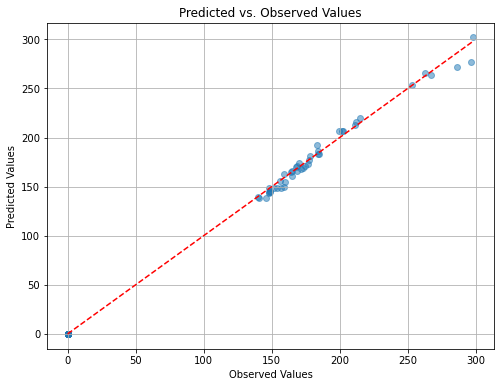

In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_cv_predictions, alpha=0.5)
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Observed Values")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()